## Final Project Day 1: K Nearest Neighbors Model for the Product Safety Dataset

For the final project, build a K Nearest Neighbors model to predict the __human_tag__ field of the dataset. You will submit your predictions to the Leaderboard competition here: https://leaderboard.corp.amazon.com/tasks/352

Use the notebooks from the class and implement the model, train and test with the corresponding datasets. Differently from the in-class exercise (regressor), you will develop a __classifier__. We are using F1 score to rank submissions. Sklearn provides the [__f1_score():__](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) function if you want to see how your model works on your training or validation set.

You can follow these steps:
1. Read training-test data (Given)
2. Train a KNN classifier (Implement)
3. Make predictions on your test dataset (Implement)
4. Write your test predictions to a CSV file (Given)

__You can use the KNN Classifier from here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html__

## 1. Reading the dataset

We will use the __pandas__ library to read our dataset. Let's first run the following credential cell and then download the files.

#### __Training data:__

In [1]:
import pandas as pd

train_df = pd.read_csv('data/final_project/training.csv', encoding='utf-8', header=0)
train_df.head()

,ID,doc_id,text,date,star_rating,title,human_tag
0,47490,15808037321,"I ordered a sample of the Dietspotlight Burn, ...",6/25/2018 17:51,1,DO NOT BUY!,0
1,16127,16042300811,This coffee tasts terrible as if it got burnt ...,2/8/2018 15:59,2,Coffee not good,0
2,51499,16246716471,I've been buying lightly salted Planters cashe...,3/22/2018 17:53,2,"Poor Quality - Burnt, Shriveled Nuts With Blac...",0
3,36725,14460351031,This product is great in so many ways. It goes...,12/7/2017 8:49,4,"Very lovey product, good sunscreen, but strong...",0
4,49041,15509997211,"My skin did not agree with this product, it wo...",3/21/2018 13:51,1,Not for everyone. Reactions can be harsh.,1


#### __Test data:__

In [18]:
import pandas as pd

test_df = pd.read_csv('data/final_project/test.csv', encoding='utf-8', header=0)
test_df.head()

,ID,doc_id,text,date,star_rating,title
0,62199,15449606311,"Quality of material is great, however, the bac...",3/7/2018 19:47,3,great backpack with strange fit
1,76123,15307152511,The product was okay but wasn't refined campho...,43135.875,2,Not refined
2,78742,12762748321,I normally read the reviews before buying some...,42997.37708,1,"Doesnt work, wouldnt recommend"
3,64010,15936405041,These pads are completely worthless. The light...,43313.25417,1,The lighter colored side of the pads smells li...
4,17058,13596875291,The saw works great but the blade oiler does n...,12/5/2017 20:17,2,The saw works great but the blade oiler does n...


## 2. Train a KNN Classifier
Here, you will apply pre-processing operations in the class. Then, you can split your dataset to training and validation here. For your first submission, you will use __K Nearest Neighbors Classifier__. It is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). In the competition, we are using the F1 score. In sklearn, you can use the [__f1_score():__](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) function to see your F1 score on your training or validation set.

### Exploratory data analysis and missing value imputation

Let's look at the range and distribution of __human_tag__.

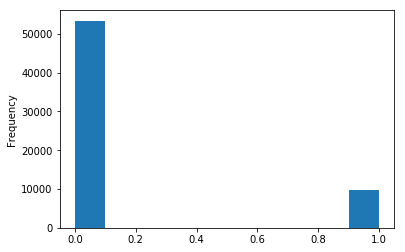

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

train_df["human_tag"].plot.hist()
plt.show()

Let's look at the range and distribution of __star_rating__.

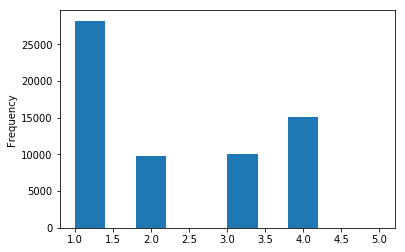

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

train_df["star_rating"].plot.hist()
plt.show()

We can check the number of missing values for each columm below.

In [5]:
print(train_df.isna().sum())


ID             0
doc_id         0
text           6
date           0
star_rating    0
title          1
human_tag      0
dtype: int64


Let's fill-in the missing values for __reviewText__ below. We will just use the placeholder "Missing" here.

In [6]:
train_df["text"].fillna("Missing", inplace=True)
train_df["title"].fillna("Missing", inplace=True)


### 3. Stop word removal and stemming

In [7]:
# Install the library and functions
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

We will create the stop word removal and text cleaning processes below. NLTK library provides a list of common stop words. We will use the list, but remove some of the words from that list. It is because those words are actually useful to understand the sentiment in the sentence.

In [8]:
import nltk, re
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Let's get a list of stop words from the NLTK library
stop = stopwords.words('english')

# These words are important for our problem. We don't want to remove them.
excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't",
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 
             'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
             'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', 
             "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# New stop word list
stop_words = [word for word in stop if word not in excluding]

snow = SnowballStemmer('english')

# Initialize the lemmatizer
wl = WordNetLemmatizer()

# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def process_text(texts, lem): 
    if (lem) :
        print ("Processing using lematisation")
    else:
        print ("Processing using stemming")
        
    final_text_list=[]
    for sent in texts:
        filtered_sentence=[]
        processed_sentence = []
        
        sent = sent.lower() # Lowercase 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
        
        for w in word_tokenize(sent):
            # We are applying some custom filtering here, feel free to try different things
            # Check if it is not numeric and its length>2 and not in stop words
            if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words):  
                # possibly Stem and add to filtered list
                if (lem):
                    filtered_sentence.append(w)
                else :
                    filtered_sentence.append(snow.stem(w))
        if (lem) :
            # Get position tags
            word_pos_tags = nltk.pos_tag(filtered_sentence)
            # Map the position tag and lemmatize the word/token
            for idx, tag in enumerate(word_pos_tags):
                processed_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))
            final_string = " ".join(processed_sentence) #lematised sentence
        else :
            final_string = " ".join(filtered_sentence) #final string of cleaned words
 
        final_text_list.append(final_string)
    
    return final_text_list

In [9]:
# use lemmatisation gloabl var
useLem = 1

print("Pre-processing the text field")
train_df["text"] = process_text(train_df["text"].tolist(), useLem) 
print("Pre-processing the title field")
train_df["title"] = process_text(train_df["title"].tolist(), useLem) 

Pre-processing the text field
Processing using lematisation
Pre-processing the title field
Processing using lematisation


### 4. Scaling numerical fields:

We will apply min-max scaling to our rating field so that they will be between 0-1.

In [10]:
train_df["star_rating"] = (train_df["star_rating"] - train_df["star_rating"].min())/(train_df["star_rating"].max()-train_df["star_rating"].min())
#train_df["time"] = (train_df["time"] - train_df["time"].min())/(train_df["time"].max()-train_df["time"].min())

### 5. Splitting the training dataset into training and validation

Sklearn library has a useful function to split datasets. We will use the __train_test_split()__ function. In the example below, we get 90% of the data for training and 10% is left for validation.

In [11]:
from sklearn.model_selection import train_test_split

# Input: "text", "star_rating"
# Target: "uman_tag"
X_train, X_val, y_train, y_val = train_test_split(train_df[["text", "title", "star_rating"]],
                                                  train_df["human_tag"].tolist(),
                                                  test_size=0.10,
                                                  shuffle=True
                                                 )

### 6. Computing Bag of Words features

We are using binary features here. TF and TF-IDF are also other options.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize the binary count vectorizer
tfidf_vectorizer = CountVectorizer(binary=True,
                                   max_features=200    # Limit the vocabulary size
                                  )
tfidf_vectorizer_title = CountVectorizer(binary=True,
                                   max_features=100    # Limit the vocabulary size
                                  )
# Fit and transform
X_train_text_vectors = tfidf_vectorizer.fit_transform(X_train["text"].tolist())
X_train_title_vectors = tfidf_vectorizer_title.fit_transform(X_train["title"].tolist())
# Only transform
X_val_text_vectors = tfidf_vectorizer.transform(X_val["text"].tolist())
X_val_title_vectors = tfidf_vectorizer_title.transform(X_val["title"].tolist())

Let's print our vocabulary below. The number next to the word is its index in the vocabulary.

In [13]:
print(tfidf_vectorizer.vocabulary_)
print(tfidf_vectorizer_title.vocabulary_)


{'look': 94, 'good': 62, 'however': 77, 'start': 165, 'could': 31, 'see': 151, 'burnt': 21, 'never': 109, 'back': 10, 'make': 98, 'pay': 122, 'return': 145, 'bad': 11, 'item': 81, 'amazon': 5, 'get': 59, 'not': 113, 'two': 182, 'different': 37, 'problem': 130, 'expect': 47, 'fire': 55, 'light': 89, 'work': 196, 'box': 16, 'smell': 161, 'like': 90, 'something': 163, 'burn': 19, 'still': 168, 'come': 29, 'also': 3, 'would': 198, 'place': 125, 'close': 27, 're': 136, 'try': 180, 'stick': 167, 'even': 43, 'use': 184, 'size': 158, 'every': 45, 'actually': 1, 'pretty': 127, 'away': 9, 'easy': 40, 'people': 123, 'clean': 26, 'take': 171, 'remove': 143, 'heat': 70, 'hard': 69, 'keep': 82, 'break': 18, 'piece': 124, 'stay': 166, 'taste': 172, 'great': 63, 'day': 34, 'week': 192, 'help': 71, 'need': 108, 'money': 105, 'second': 150, 'time': 178, 'purchase': 132, 'product': 131, 'first': 56, 'really': 138, 'want': 186, 'think': 176, 'buy': 22, 'long': 93, 'around': 8, 'it': 80, 'hair': 64, 've': 

### 7. Fitting Classifier

In [14]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

from time import time
start = time()

# Let' merge our features
X_train_features = np.column_stack((X_train_text_vectors.toarray(), 
                                    X_train_title_vectors.toarray(),
                                    X_train["star_rating"].values )
                                  )

# Using the default KNN with 5 nearest neighbors
knnClass = KNeighborsClassifier(n_neighbors=5)
knnClass.fit(X_train_features, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### 8. Checking model performance on the validation dataset


In [16]:
from sklearn.metrics import f1_score, mean_squared_error

X_val_features = np.column_stack((X_val_text_vectors.toarray(), 
                                  X_val_title_vectors.toarray(),
                                  X_val["star_rating"].values) )

val_predictions = knnClass.predict(X_val_features)

end = time()
print('KNN Training and validation time for one value of K (in seconds):', end-start)

print("Mean_squared_error: %f,  f1_score: %f" % (mean_squared_error(y_val, val_predictions), f1_score(y_val, val_predictions)))

KNN Training and validation time for one value of K (in seconds): 362.6898639202118
Mean_squared_error: 0.171207,  f1_score: 0.269101


### 9. Trying different K values

Let's try different K values and see how the model performs with each one.

*Note: When experimenting with different values of K, keep in mind that KNN training and validation for one value of K can take around 1 minute*

In [ ]:
K_values = [4, 5, 6, 7]

for K in K_values:
    knnClass = KNeighborsClassifier(n_neighbors=K)
    knnClass.fit(X_train_features, y_train)
    val_predictions = knnClass.predict(X_val_features)
    print("K=%d, Mean_squared_error: %f,  f1_score: %f" % (K, mean_squared_error(y_val, val_predictions), f1_score(y_val, val_predictions)))

In [ ]:
print(val_predictions)

## 3. Make predictions on your test dataset

Once we select our best performing model, we can use it to make predictions on the test dataset. You can simply use __.fit()__ function with your training data to use the best performing K value and use __.predict()__ with your test data to get your test predictions.

In [19]:
# Pre process the test dataset same as we did training
test_df["text"].fillna("Missing", inplace=True)
test_df["title"].fillna("Missing", inplace=True)
print("Pre-processing the text field")
test_df["text"] = process_text(test_df["text"].tolist(), useLem) 
print("Pre-processing the title field")
test_df["title"] = process_text(test_df["title"].tolist(), useLem) 
test_text_vectors = tfidf_vectorizer.transform(test_df["text"].tolist())
test_title_vectors = tfidf_vectorizer_title.transform(test_df["title"].tolist())
#numerics
test_df["star_rating"] = (test_df["star_rating"] - test_df["star_rating"].min())/(test_df["star_rating"].max()-test_df["star_rating"].min())

# Using the default KNN with 5 nearest neighbors
knnClass = KNeighborsClassifier(n_neighbors=5)
knnClass.fit(X_train_features, y_train)

# Now predict the test dataset
test_features = np.column_stack((test_text_vectors.toarray(), 
                                 test_title_vectors.toarray(),
                                  test_df["star_rating"].values) )

test_predictions = knnClass.predict(test_features)

print(test_predictions)

Pre-processing the text field
Processing using lematisation
Pre-processing the title field
Processing using lematisation
[0 0 0 ... 0 0 0]


## 4. Write your predictions to a CSV file
You can use the following code to write your test predictions to a CSV file. Then upload your file to https://leaderboard.corp.amazon.com/tasks/352/submit

In [20]:
import pandas as pd
 
result_df = pd.DataFrame()
result_df["ID"] = test_df["ID"]
result_df["human_tag"] = test_predictions
 
result_df.to_csv("project_day1_result_2.csv", encoding='utf-8', index=False)